<a href="https://colab.research.google.com/github/Jonathan-code-hub/MAT421/blob/main/ModuleH22_4_22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Describe the difference between boundary value problems and the initial value problems in ODE.

Intial value problems look at conditions at a single or multiple points.
Boundary value problems look at specified conditions at different points within a domain.

IVPs are typically used to describe dynamic systems where the evolution of the system is determined by its initial state.
While BVPs are more commonly used in steady-state problems or problems defined over a finite domain where boundary conditions play a crucial role.

2. Try to describe the intuition behind the shooting method and how it links to the initial value problems.


The shooting method is a numerical technique used to solve boundary value problems (BVPs) by transforming them into a sequence of initial value problems (IVPs). The intuition behind the shooting method can be understood through its analogy to aiming at a target.
Where You know the starting position (where you shoot from) and the desired ending position (the target). However, you don't know the initial velocity or angle required to precisely hit the target. So, what do you do? You take a guess and observe.

3. What is the finite difference method for boundary value problems? How to solve it?

The finite difference method (FDM) is a numerical technique used to solve differential equations, particularly boundary value problems (BVPs).

Divide the domain of the problem into a finite number of discrete points or nodes. Replace the derivatives in the original differential equation with finite difference approximations. Use the finite difference approximations to discretize the original differential equation. Incorporate the boundary conditions into the system of algebraic equations. Solve the resulting system of algebraic equations.

5. Solve the following ODE with y(0)=0
 and y(π)=0:

 $y′′+sin(y)+1=0$


Initial guess for y2(0): 1.9999990463256836


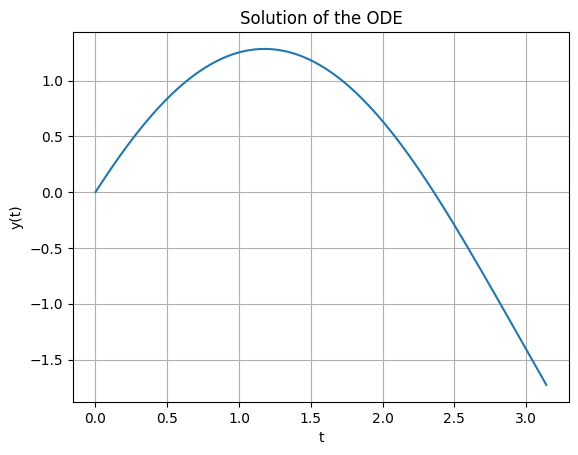

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

def ode_system(t, y):
    y1, y2 = y
    dydt = [y2, -np.sin(y1) - 1]
    return dydt

def shooting_method(y2_guess):
    t_span = [0, np.pi]
    y0 = [0, y2_guess]
    sol = solve_ivp(ode_system, t_span, y0, method='RK45', dense_output=True)
    return sol.sol

def find_root(func, a, b, tol=1e-6):
    while (b - a) / 2 > tol:
        mid = (a + b) / 2
        if func(mid) == 0:
            return mid
        elif func(a) * func(mid) < 0:
            b = mid
        else:
            a = mid
    return (a + b) / 2

def objective_function(y2_guess):
    y_at_pi = shooting_method(y2_guess)(np.pi)[0]
    return y_at_pi

y2_guess = find_root(objective_function, -2, 2)
print("Initial guess for y2(0):", y2_guess)

# Solve the ODE with the initial condition #
solution = shooting_method(y2_guess)

# Plotting #
import matplotlib.pyplot as plt
t = np.linspace(0, np.pi, 100)
y = solution(t)[0]
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solution of the ODE')
plt.grid(True)
plt.show()

6. Given the ODE with the boundary conditions y(0)=0
 and y(12)=0
, $y′′+0.5x2−6x=0$
what′s the value of
y’(0)?

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

def ode_system(x, y):
    y1, y2 = y
    dydx = [y2, -0.5*x**2 + 6*x]
    return dydx

# Define x range  #
x_span = [0, 12]

# Define the initial condition #
y_initial = [0, 0]  # y(0) = 0, y'(0) = ?

# Solve the ODE #
solution = solve_ivp(ode_system, x_span, y_initial, method='RK45', dense_output=True)

# Interpolate #
y_prime_at_0 = solution.sol(0)[1]

print("The value of y'(0) is:", y_prime_at_0)

The value of y'(0) is: 0.0
